<a href="https://colab.research.google.com/github/SantiCusse/Proyecto_Final/blob/main/Proyecto_Final_Santiago_Cusse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación de Paquetes e importación de librerias

In [161]:
!pip install sodapy
!pip install catboost

In [162]:
# Tratamiento de datos
# ==============================================================================
import requests  # Biblioteca para realizar solicitudes HTTP de manera sencilla
import numpy as np  # Biblioteca fundamental para la computación numérica en Python
import pandas as pd  # Biblioteca para la manipulación y análisis de datos tabulares en Python
from sodapy import Socrata  # Biblioteca para acceder a datos abiertos a través del protocolo SODA (Socrata Open Data API)
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos estáticos como líneas, dispersión, etc.
import seaborn as sns  # Biblioteca para mejorar la visualización de datos y crear gráficos estadísticos atractivos
import matplotlib.cm as cm  # Módulo para trabajar con mapas de colores en Matplotlib

# Preprocesado y modelado
# ==============================================================================
from catboost import CatBoostClassifier  # Biblioteca de aprendizaje automático para problemas de clasificación
from sklearn.model_selection import train_test_split  # Función para dividir un conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import accuracy_score, classification_report  # Funciones para calcular métricas de rendimiento en modelos de clasificación
from datetime import datetime  # Módulo para trabajar con fechas y horas en Python
from sklearn.preprocessing import LabelEncoder  # Clase para codificar variables categóricas en variables numéricas
from sklearn.decomposition import PCA  # Clase para realizar análisis de componentes principales
from sklearn.pipeline import make_pipeline  # Función para construir una cadena de transformaciones de datos seguida de un estimador
from sklearn.preprocessing import StandardScaler  # Clase para estandarizar características escalando cada característica para que tenga una media de cero y una varianza unitaria
from sklearn.ensemble import RandomForestClassifier  # Clase para implementar un clasificador de bosques aleatorios
from imblearn.over_sampling import SMOTE  # Clase para abordar problemas de desequilibrio de clases en conjuntos de datos
from sklearn.cluster import KMeans  # Clase para realizar agrupamiento utilizando el algoritmo K-Means
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples, calinski_harabasz_score  # Funciones para evaluar la calidad de los clústeres
from sklearn.model_selection import KFold, GridSearchCV

# Configuración warnings
# ==============================================================================
import warnings  # Biblioteca para controlar advertencias generadas durante la ejecución del código

# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Importación y Análisis del Dataset

In [163]:
client = Socrata("data.bloomington.in.gov", None)

results = client.get("e245-r9ub", limit=100000)

df = pd.DataFrame.from_records(results)

Vamos a hacer una descripción general de los datos

In [164]:
info_df = pd.DataFrame(columns=['Variable', 'Cantidad de Registros', 'Formato', 'Cantidad de Nulos', 'Ejemplo', 'Valores Únicos'])


for col in df.columns:

    num_records = df[col].count()
    data_type = df[col].dtype
    num_nulls = df[col].isnull().sum()
    example_value = df[col].iloc[0]
    num_unique_values = df[col].nunique()
    info_df = info_df.append({'Variable': col,
                              'Cantidad de Registros': num_records,
                              'Formato': data_type,
                              'Cantidad de Nulos': num_nulls,
                              'Ejemplo': example_value,
                              'Valores Únicos': num_unique_values},
                             ignore_index=True)
print(info_df.to_string(index=False))

        Variable Cantidad de Registros Formato Cantidad de Nulos                    Ejemplo Valores Únicos
              id                 33311  object                 0                      15801          18150
      intakedate                 33311  object                 0    2009-11-28T00:00:00.000          12717
    intakereason                 33309  object                 2                     Moving             27
      istransfer                 33311    bool                 0                      False              2
     sheltercode                 33311  object                 0                  C09115463          18150
identichipnumber                 29282  object              4029                 0A115D7358          14603
      animalname                 33311  object                 0                     Jadzia           9068
       breedname                 33239  object                72        Domestic Short Hair           1281
      basecolour                 3331

A continuación podemos ver la información que contiene el dataset sobre el cual se hizo el análisis

In [165]:
#Revisamos cantidad de filas y columnas
df.shape

(33311, 23)

In [166]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returnedreason,deceasedreason,diedoffshelter,puttosleep,isdoa,returndate,deceaseddate
0,15801,2009-11-28T00:00:00.000,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,2017-05-13T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,NaN,NaN
1,15932,2009-12-08T00:00:00.000,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,NaN,NaN
2,28859,2012-08-10T00:00:00.000,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2017-04-15T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,2020-02-28T00:00:00.000,NaN
3,28859,2012-08-10T00:00:00.000,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2020-02-29T00:00:00.000,Reclaimed,False,Stray,Died in care,False,False,False,2023-11-06T00:00:00.000,NaN
4,28859,2012-08-10T00:00:00.000,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,2023-12-17T00:00:00.000,Adoption,False,Stray,Died in care,False,False,False,NaN,NaN


Antes de empezar a hacer el análisis tenemos que hacer una limpieza del dataset. En primer lugar vamos a ver qué columnas tienen datos nulos y su cantidad. Además vamos a eliminar las columnas que consideramos que no aportan información valiosa.

In [167]:
#Elimino Columnas que no me aportan información y las que tienen muchos registros nulos
df = df.drop(columns=['returndate'])
df = df.drop(columns=['deceaseddate'])
df = df.drop(columns=['identichipnumber'])

#Elimino los registros con datos nulos
df = df.dropna(subset=['intakereason'])
df = df.dropna(subset=['breedname'])
df = df.dropna(subset=['basecolour'])



In [168]:
#Convierto el campo 'movementdate' a tipo fecha y me quedo solo con la parte de la fecha, sin la hora
df['movementdate'] = pd.to_datetime(df['movementdate'])

df['movementdate'] = df['movementdate'].dt.date


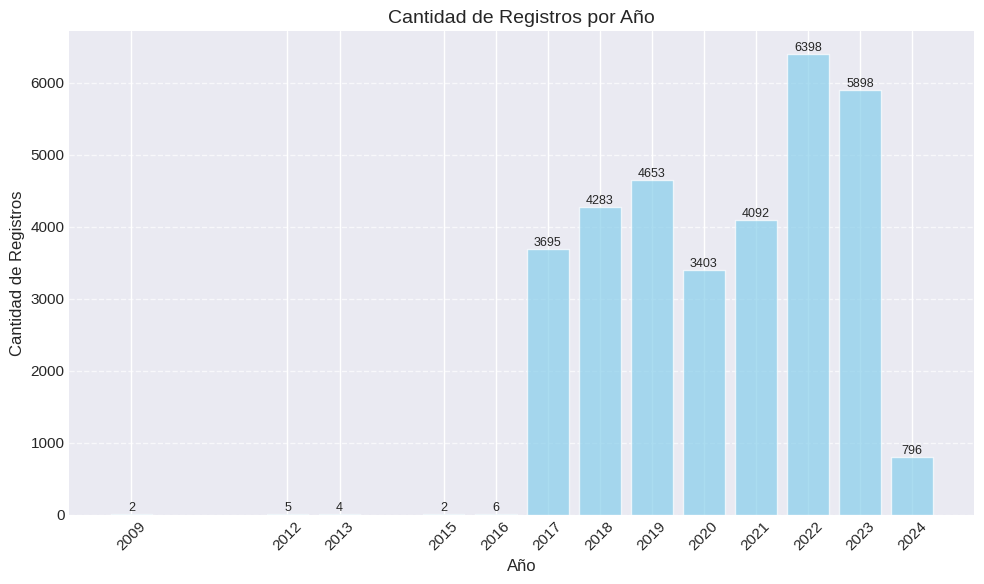

In [169]:
# Convertimos la columna 'intakedate' al formato de fecha si no está en ese formato
df['intakedate'] = pd.to_datetime(df['intakedate'])

# Extraemos el año de la columna 'intakedate'
df['year'] = df['intakedate'].dt.year

# Contar la cantidad de registros por año
records_per_year = df['year'].value_counts().sort_index()

# Gráficamos
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

# Creamos el gráfico de barras
bars = plt.bar(records_per_year.index, records_per_year.values, color='skyblue', alpha=0.7)

# Añadimos etiquetas, título y ajustes visuales
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.title('Cantidad de Registros por Año', fontsize=14)
plt.xticks(records_per_year.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregamos valores en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [170]:
#Tomo los datos de 2017 en adelante ya que anterior a ese año tenemos muy pocos datos
df = df[(df['year'] >2016)].copy()
#Elimino registros duplicados
df.drop_duplicates(inplace=True)

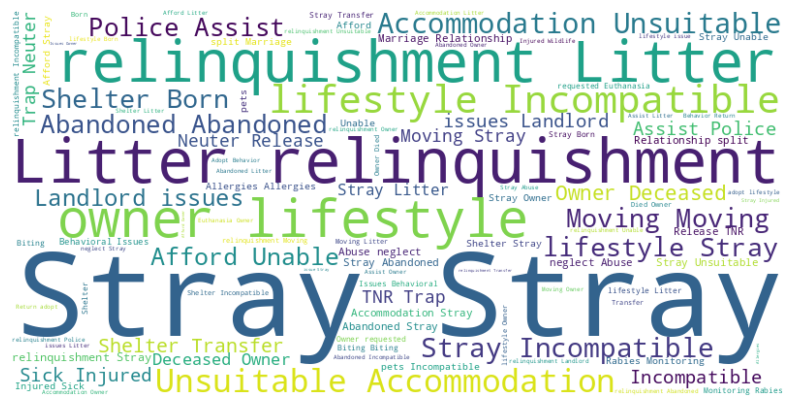

In [171]:
from wordcloud import WordCloud
# Unimos todas las palabras en la columna 'intakereason'
text = ' '.join(df['intakereason'].dropna().astype(str))

# Creamos un objeto WordCloud con un tamaño de fuente máxima según la frecuencia
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text)

# Mostramos la imagen de la nube de palabras
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Por otro lado hacemos el análisis de los outliers, principalmente sobre la edad de los animales que es un punto importante para nuestro informe. En general tenemos muy pocos registros por encima de los 30 años de edad y pensando en la edad posible de una mascota, es muy raro encontrar animales tan longevos. es por eso que estos registros los voy a excluir del análisis.

In [172]:
#No me interesa saber en detalle la cantidad de meses que tiene el animal, por lo tanto si tiene meses o semanas lo reemplazo por 0 que se va a interpretar como que tiene menos de 1 año.
df['animalage'] = df['animalage'].apply(lambda x: '0 ' if 'year' not in str(x) else x)
# Separo el campo a partir del primer espacio y me quedo con el primer valor que corresponde a la cantidad de años
df['animalage'] = df['animalage'].str.split().str[0]
# Transformo a tipo numérico
df['animalage'] = pd.to_numeric(df['animalage'], errors='coerce')

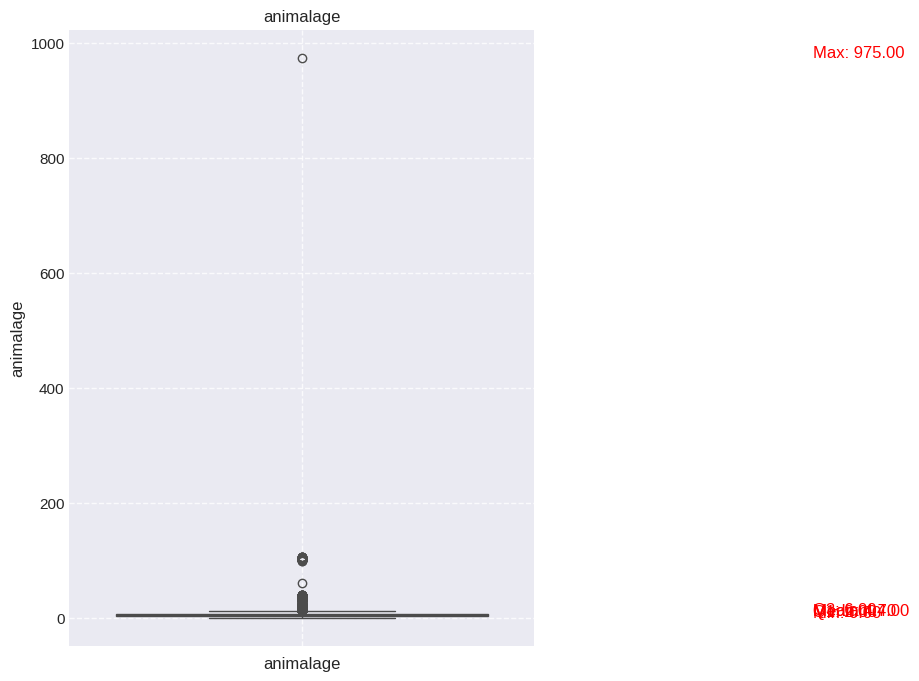

In [173]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df, y='animalage', palette='Set1')

plt.title('animalage')
plt.xlabel('animalage')
plt.grid(True, linestyle='--', alpha=0.8)

# Calculo estadisticos
age_stats = df['animalage'].describe()
# Marco los valores en el gráfico
plt.text(1.1, age_stats['max'], f'Max: {age_stats["max"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['min'], f'Min: {age_stats["min"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['25%'], f'Q1: {age_stats["25%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['50%'], f'Median: {age_stats["50%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['75%'], f'Q3: {age_stats["75%"]:.2f}', fontsize=12, color='red')
plt.text(1.1, age_stats['mean'], f'Mean: {age_stats["mean"]:.2f}', fontsize=12, color='red')

plt.show()

In [174]:
# Calculo de percentiles e IQR
percentile25 = df['animalage'].quantile(0.25)
percentile75 = df['animalage'].quantile(0.75)
iqr = percentile75 - percentile25

# Calculo de límites
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Busco los outliers
outliers_above = df[df['animalage'] > upper_limit][['animalage', 'speciesname']]
outliers_below = df[df['animalage'] < lower_limit][['animalage', 'speciesname']]

In [175]:
#Analizo los outliers_above
outliers_above_20 = outliers_above[outliers_above['animalage'] > 30]
outliers_above_20_sorted = outliers_above_20.sort_values(by='animalage')
print(outliers_above_20_sorted)

       animalage speciesname
14893         31         Cat
13199         31         Dog
12254         31         Cat
10386         31         Dog
12736         31         Cat
...          ...         ...
649          105        Bird
2156         105         Cat
927          105         Cat
1962         105         Cat
1747         975         Cat

[105 rows x 2 columns]


In [176]:
# Excluyo los outliers analizados que sean maypres a 22 años ya que es raro que estos animales tengan mas de 30 años
# Los outliers_below no los elimino ya que son los que tienen edad entre 0 y 1 año
df2 = df[(df['animalage'] <30 )].copy()

Con el dataset limpio podemos empezar a hacer distintos análisis de los parametros que tenemos registrados.
En primer lugar me interesa saber qué animales son los que ingresan en mayor cantidad. Intuyo que deben ser perros y gatos pero puede haber algún otro tipo de animal que presente una cantidad considerable de ingresos y amerite su inclusión en el análisis posterior.

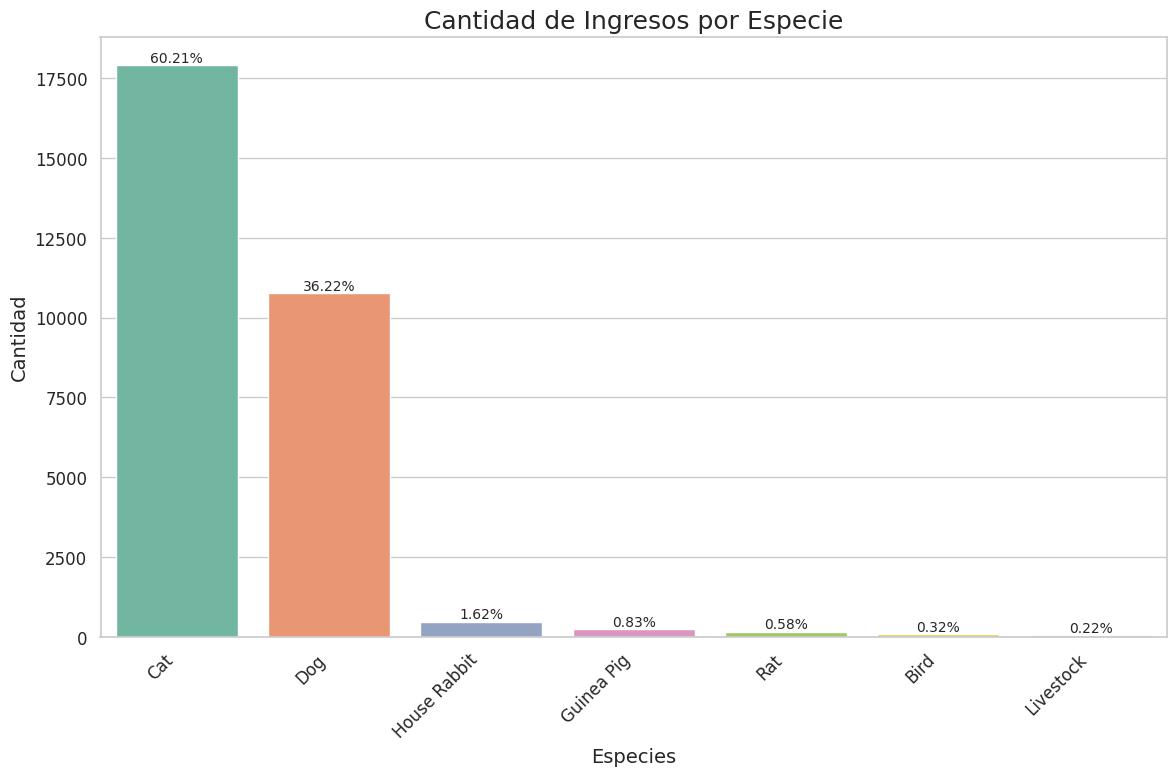

In [177]:
speciesname_counts = df2['speciesname'].value_counts()
speciesname_more_than_10 = speciesname_counts[speciesname_counts > 50].index.tolist()

filtered_df = df2[df2['speciesname'].isin(speciesname_more_than_10)]

filtered_df_counts = filtered_df['speciesname'].value_counts()

plt.figure(figsize=(12, 8))  # Ajustar tamaño del gráfico para mejor visualización
sns.set(style="whitegrid", font_scale=1.2)  # Cambiar estilo a whitegrid y ajustar tamaño de fuente

ax = sns.countplot(data=filtered_df, x='speciesname', palette='Set2', order=filtered_df['speciesname'].value_counts().index)  # Personalizar paleta de colores y orden de barras
ax.set_title('Cantidad de Ingresos por Especie', fontsize=18)  # Añadir un título al gráfico
ax.set_xlabel('Especies', fontsize=14)  # Etiqueta del eje x
ax.set_ylabel('Cantidad', fontsize=14)  # Etiqueta del eje y

# Rotar etiquetas del eje x para mejor legibilidad y ajustar espacio
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir porcentaje en las barras
total = float(len(filtered_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{(height / total * 100):.2f}%',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()

Claramente tenemos mayoría de gatos y perros pero con una llamativa superioridad de los gatos sobre los perros. Por otro lado aparecen los conejos, ratas, pájaros y cerdos como los más ingresados pero en cantidades muy inferiores a los primeros dos del podio.

Vamos a analizar un poco más en detalle las características de los perros y los gatos que ingresan al refugio. Para esto podemos armar un boxplot de la edad de dichos animales. Los analizamos por separado ya que tanto el comportamiento como la longevidad de los mismos es distinta.

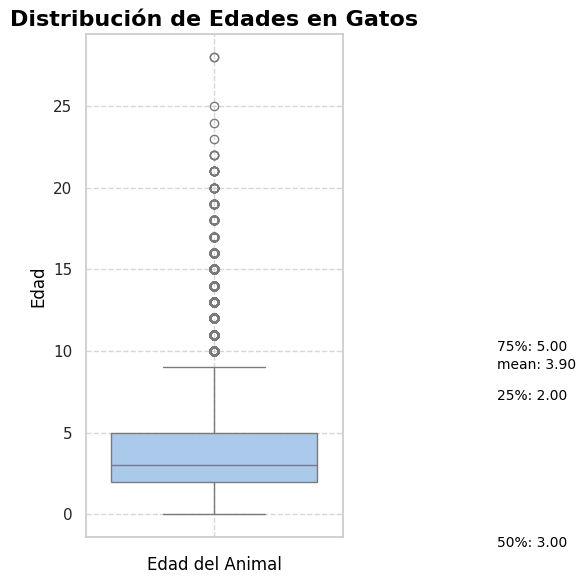

In [178]:
cat_data = df2[df2['speciesname'] == 'Cat']

plt.figure(figsize=(8, 6))  # Ajustar tamaño del gráfico
sns.set(style="whitegrid", palette="pastel")  # Cambiar estilo y paleta de colores

sns.boxplot(data=cat_data, y='animalage')

plt.title('Distribución de Edades en Gatos', fontsize=16, fontweight='bold', color='black')  # Título
plt.xlabel('Edad del Animal', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Edad', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.8)

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
age_stats = cat_data['animalage'].describe()
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'],
                               [age_stats['25%'], age_stats['50%'], age_stats['75%'], age_stats['mean']],
                               [5, -5, 5, 5]):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()

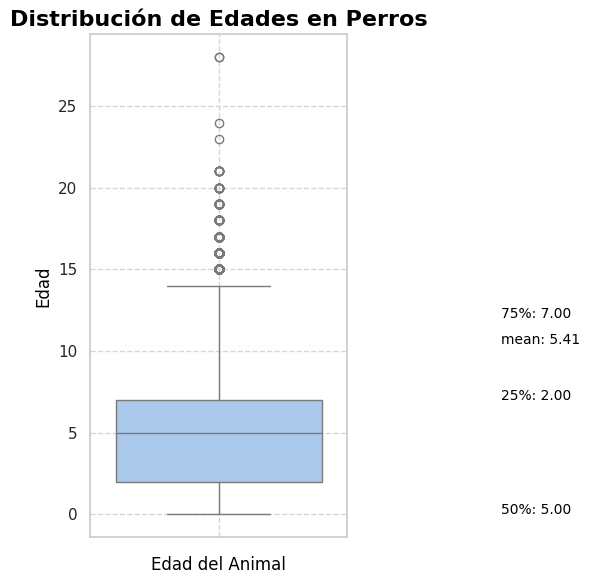

In [179]:
cat_data = df2[df2['speciesname'] == 'Dog']

plt.figure(figsize=(8, 6))  # Ajustar tamaño del gráfico
sns.set(style="whitegrid", palette="pastel")  # Cambiar estilo y paleta de colores

sns.boxplot(data=cat_data, y='animalage')

plt.title('Distribución de Edades en Perros', fontsize=16, fontweight='bold', color='black')  # Título
plt.xlabel('Edad del Animal', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Edad', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.8)

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
age_stats = cat_data['animalage'].describe()
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'],
                               [age_stats['25%'], age_stats['50%'], age_stats['75%'], age_stats['mean']],
                               [5, -5, 5, 5]):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico
plt.show()


Podemos ver que hay una diferencia en interesante en la edad media que tienen estos animales al momento de ingresar al refugio. Si bien los gatos en buenas condiciones viven más que los perros, vemos que ingresan al refugio a una edad más temprana. En ambos casos el promedio ingresa por encima de los 3 años de edad por lo cual se puede decir que ya son animales adultos.

Ahora que entendemos un poco más sobre la característica de los aniamles que ingresan, vamos a estudiar las razones por las que ingresan. En primer lugar listamos todas las razones que podemos encontrar en el dataset y luego hacemos foco en las más comunes para sacar conclusiones.

In [180]:

filtered_intakereason_sorted = filtered_df_counts.sort_values(ascending=False)

total_count = filtered_intakereason_sorted.sum()

for intakereason, count in filtered_intakereason_sorted.items():
    percentage = (count / total_count) * 100
    print(f"intakereason: {intakereason}, Count: {count}, Percentage: {percentage:.2f}%")

intakereason: Cat, Count: 17901, Percentage: 60.21%
intakereason: Dog, Count: 10769, Percentage: 36.22%
intakereason: House Rabbit, Count: 481, Percentage: 1.62%
intakereason: Guinea Pig, Count: 247, Percentage: 0.83%
intakereason: Rat, Count: 172, Percentage: 0.58%
intakereason: Bird, Count: 96, Percentage: 0.32%
intakereason: Livestock, Count: 65, Percentage: 0.22%


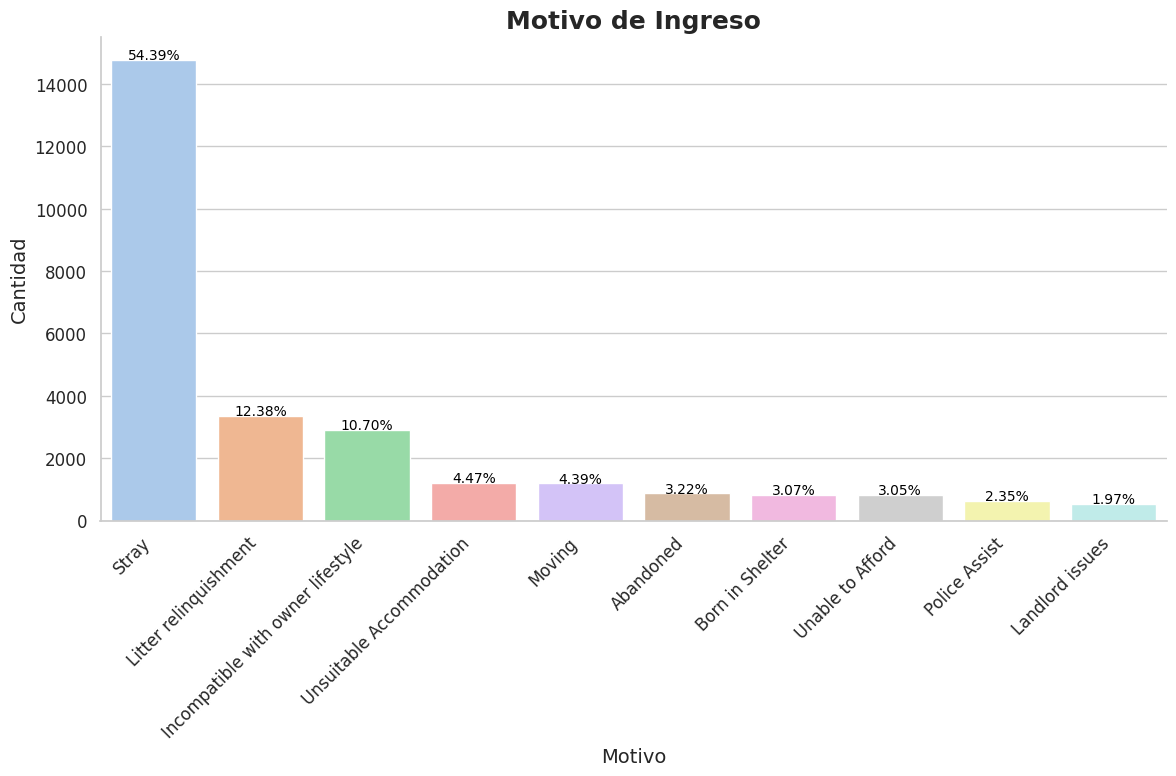

In [181]:
intakereason_counts = df2['intakereason'].value_counts()
intakereason_more_than_10 = intakereason_counts[intakereason_counts > 500].index.tolist()

filtered_df = df2[df2['intakereason'].isin(intakereason_more_than_10)]

filtered_df_counts = filtered_df['intakereason'].value_counts()

plt.figure(figsize=(12, 8))  # Ajustar tamaño del gráfico para mejor visualización
sns.set(style="whitegrid", font_scale=1.2)  # Cambiar estilo a whitegrid y ajustar tamaño de fuente

ax = sns.countplot(data=filtered_df, x='intakereason', order=filtered_df['intakereason'].value_counts().index, palette='pastel')

total_valores = len(filtered_df)

for i, count in enumerate(filtered_df['intakereason'].value_counts()):
    porcentaje = (count / total_valores) * 100
    plt.text(i, count + 5, f'{porcentaje:.2f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Motivo', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_title('Motivo de Ingreso', fontsize=18, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

sns.despine(right=True, top=True)
plt.tight_layout()
plt.show()

A continuación vemos cuales son las 5 principales razones por las que los animales ingresan al refugio. Podemos observar un dato muy interesante que es que el 50% de los ingresos se deben a que los animales se pierden. En segundo lugar tenemos al abandono que acumula aproximadamente un 30% de los casos (Se consideraron casos de abandono a :
-Litter relinquishment
-Incompatible with owner lifestyle
-Moving)

A continuación vamos a calcular la cantidad de días promedio que un animal puede estar en el refugio. Además podríamos ver como distribuyen los datos para entender los valores máximos y mínimos que se manejan en un refugio de estas caracterìsticas.

In [182]:


df2['intakedate'] = pd.to_datetime(df2['intakedate'])
df2['movementdate'] = pd.to_datetime(df2['movementdate'])


df2['movementdate'].fillna(pd.to_datetime(datetime.today().date()), inplace=True)

df2['date_difference'] = (df2['movementdate'] - df2['intakedate']).dt.days

df2['date_difference'] = df2['date_difference'].mask(df2['date_difference'] < 0, 0)

print(df2)

          id          intakedate intakereason  istransfer sheltercode  \
19     47120 2017-01-11 00:00:00    Abandoned       False   C17011137   
20     47120 2017-01-11 00:00:00    Abandoned       False   C17011137   
21     47146 2017-01-17 00:00:00    Abandoned       False   D17011163   
22     47146 2017-01-17 00:00:00    Abandoned       False   D17011163   
23     47156 2017-01-17 00:00:00    Abandoned       False   R17011173   
...      ...                 ...          ...         ...         ...   
33306  79475 2024-03-19 16:46:48        Stray       False    C2403341   
33307  79484 2024-03-21 17:10:06        Stray       False    C2403344   
33308  79485 2024-03-21 21:09:58        Stray       False    D2403345   
33309  79488 2024-03-22 14:35:37        Stray       False    D2403347   
33310  79493 2024-03-23 11:23:58        Stray       False    D2403349   

          animalname                         breedname       basecolour  \
19            Vivian                         Him

In [183]:
# Calcula los límites para los outliers
q1 = df2['date_difference'].quantile(0.25)
q3 = df2['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtra el DataFrame original para crear uno nuevo sin outliers y solo con 'Cat' o 'Dog'
df3 = df2[
    (df2['date_difference'] >= lower_bound) & (df2['date_difference'] <= upper_bound) &
    (df2['speciesname'].isin(['Cat', 'Dog']))
].copy()

# Verifica el nuevo DataFrame sin outliers y solo con 'Cat' o 'Dog'
print(df3)

          id          intakedate intakereason  istransfer sheltercode  \
19     47120 2017-01-11 00:00:00    Abandoned       False   C17011137   
20     47120 2017-01-11 00:00:00    Abandoned       False   C17011137   
21     47146 2017-01-17 00:00:00    Abandoned       False   D17011163   
22     47146 2017-01-17 00:00:00    Abandoned       False   D17011163   
28     47198 2017-01-22 00:00:00    Abandoned       False   C17011213   
...      ...                 ...          ...         ...         ...   
33306  79475 2024-03-19 16:46:48        Stray       False    C2403341   
33307  79484 2024-03-21 17:10:06        Stray       False    C2403344   
33308  79485 2024-03-21 21:09:58        Stray       False    D2403345   
33309  79488 2024-03-22 14:35:37        Stray       False    D2403347   
33310  79493 2024-03-23 11:23:58        Stray       False    D2403349   

          animalname                         breedname       basecolour  \
19            Vivian                         Him

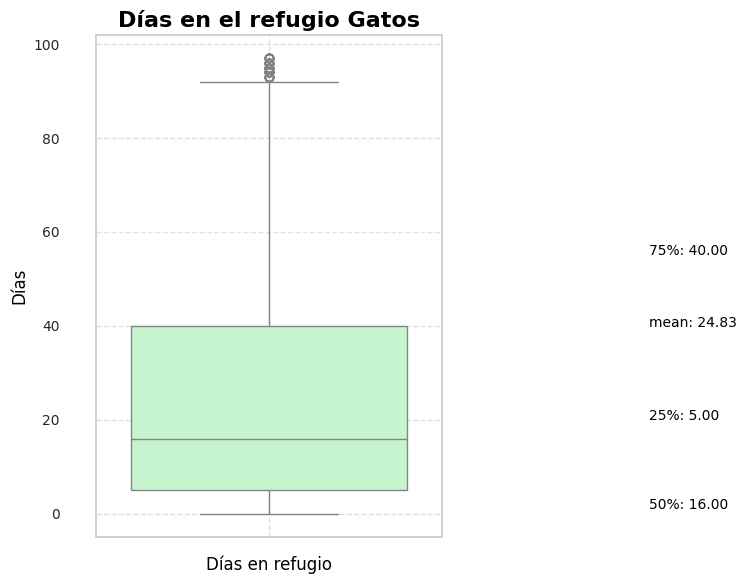

In [184]:

cat_data_dias = df3[df3['speciesname'] == 'Cat']
plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
custom_palette = sns.color_palette(['#BDFCC9', '#98FB98', '#7FFFD4', '#66CDAA', '#20B2AA'])  # Definir una paleta de verdes claros
sns.set(style="whitegrid", palette=custom_palette)  # Establecer estilo y paleta de colores



# Filtrar outliers para el gráfico de caja
q1 = cat_data_dias['date_difference'].quantile(0.25)
q3 = cat_data_dias['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_df_cat = cat_data_dias[(cat_data_dias['date_difference'] >= lower_bound) & (cat_data_dias['date_difference'] <= upper_bound)]

sns.boxplot(data=filtered_df_cat, y='date_difference')

plt.title('Días en el refugio Gatos', fontsize=16, fontweight='bold', color='black')  # Título más claro y en negrita
plt.xlabel('Días en refugio', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Días', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.6)  # Reducir opacidad de la cuadrícula

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
date_stats = filtered_df_cat['date_difference'].describe()
vertical_offsets = [15, -15, 15, 15]  # Ajuste vertical de las etiquetas
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'], [date_stats['25%'], date_stats['50%'], date_stats['75%'], date_stats['mean']], vertical_offsets):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico

# Ajustar espaciado entre los ticks del eje y
plt.yticks(fontsize=10)  # Tamaño de fuente
plt.gca().tick_params(axis='y', which='major', pad=20)  # Ajuste de espaciado entre los ticks del eje y

plt.show()

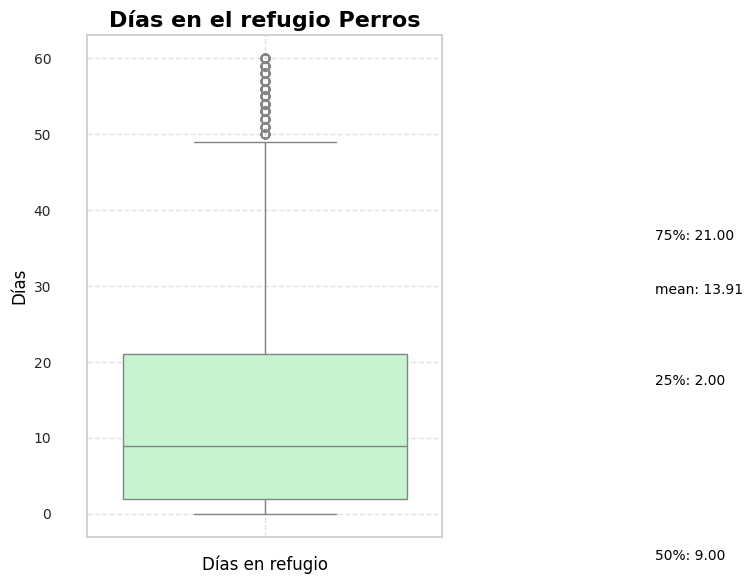

In [185]:
Dog_data_dias = df3[df3['speciesname'] == 'Dog']

plt.figure(figsize=(10, 6))  # Ajustar tamaño del gráfico
custom_palette = sns.color_palette(['#BDFCC9', '#98FB98', '#7FFFD4', '#66CDAA', '#20B2AA'])  # Definir una paleta de verdes claros
sns.set(style="whitegrid", palette=custom_palette)  # Establecer estilo y paleta de colores

# Filtrar outliers para el gráfico de caja
q1 = Dog_data_dias['date_difference'].quantile(0.25)
q3 = Dog_data_dias['date_difference'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
filtered_df_dog = Dog_data_dias[(Dog_data_dias['date_difference'] >= lower_bound) & (Dog_data_dias['date_difference'] <= upper_bound)]

sns.boxplot(data=filtered_df_dog, y='date_difference')

plt.title('Días en el refugio Perros', fontsize=16, fontweight='bold', color='black')  # Título más claro y en negrita
plt.xlabel('Días en refugio', fontsize=12, color='black')  # Etiqueta del eje x
plt.ylabel('Días', fontsize=12, color='black')  # Etiqueta del eje y
plt.grid(True, linestyle='--', alpha=0.6)  # Reducir opacidad de la cuadrícula

# Mostrar medidas estadísticas en el gráfico con tamaño y color definidos
date_stats = filtered_df_dog['date_difference'].describe()
vertical_offsets = [15, -15, 15, 15]  # Ajuste vertical de las etiquetas
for stat, y_pos, offset in zip(['25%', '50%', '75%', 'mean'], [date_stats['25%'], date_stats['50%'], date_stats['75%'], date_stats['mean']], vertical_offsets):
    plt.text(1.1, y_pos + offset, f'{stat}: {y_pos:.2f}', fontsize=10, color='black')  # Ajuste de la posición

plt.tight_layout()  # Ajustar diseño del gráfico

# Ajustar espaciado entre los ticks del eje y
plt.yticks(fontsize=10)  # Tamaño de fuente
plt.gca().tick_params(axis='y', which='major', pad=20)  # Ajuste de espaciado entre los ticks del eje y

plt.show()

In [186]:

max_date_difference = df3['date_difference'].max()

mean_date_difference = df3['date_difference'].mean()

print(f"Maximo de dias en refugio: {max_date_difference:.2f}")

print(f"Promedio general dias en refugio: {mean_date_difference}")

Maximo de dias en refugio: 130.00
Promedio general dias en refugio: 24.519613325876808


In [187]:
df3.shape

(25034, 22)

Podemos observar que la cantidad de días promedio es de 24, es decir aproximadamente 1 mes.
Este es un dato sumamente importante porque a partir del mismo se pueden calcular los recursos necesarios para tener en funcionamiento el refugio. Además se puede tener bajo control la rotación de los animales revisando los casos que estan por encima de la estadía promedio para reforzar las medidas que se toman para encontrarles un hogar.

Vamos a seguir analizando el dataset pero solamente para las especies de Perro y Gato ya que estos abarcan más del 90% de los casos. Lo que nos interesa saber es qué variables nos explican la cantidad de días que un perro o un gato estàn en trànsito en el refugio. En base a esto, una vez ingresado un animal vamos a poder estimar la cantidad de días que va a ocupar un espacio, la cantidad de alimento y medicamentos que va a necesitar.

# Entrenando y Evaluando un modelo de Machine Learning

Vamos a entrenar un modelo de machine learning para predecir si un animal que ingresa al refugio va a estar más de 7 días en el mismo antes de ser adoptado. Esto nos va a servir como indicador si hay que realizar una campaña de publicidad especial para que el animal sea adoptado lo más rápido posible.
Ademàs vamos a agregar la variable Mes_Ingreso ya que puede ayudar a mejorar la predicciòn para casos nuevos.

In [188]:
# Hago una correcciòn del campo sexname filtrando los valores que no son conocidos
df3 = df3[df3['sexname'] != 'Unknown']

# Filtro el dataframe para los casos de adopción concretados
df4 = df3[(df3['movementtype'] == 'Adoption')].copy()

# Agrega la nueva columna 'campaña_especial' basada en la condición
df4['campaña_especial'] = (df4['date_difference'] > 10).astype(int)

# Agrego una columna ' Mes de entrada al refugio'
df4['Mes_Ingreso'] = df['intakedate'].dt.month

Hacemos un analisis PCA para ver en qué procentaje explican las variables independientes 'x' a la variable dependiente Y (campaña_especial) y ver si podemos eliminar alguna variable. Para esto lo primero que hacemos es un label_encoder para transformar las cariables categóricas en numéricas.

In [189]:

x4 = df4[['location','intakereason', 'breedname', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso']]
y4 = df4['campaña_especial']

label_encoder = LabelEncoder()
x4['location'] = label_encoder.fit_transform(x4['location'])
x4['intakereason'] = label_encoder.fit_transform(x4['intakereason'])
x4['breedname'] = label_encoder.fit_transform(x4['breedname'])
x4['basecolour'] = label_encoder.fit_transform(x4['basecolour'])
x4['speciesname'] = label_encoder.fit_transform(x4['speciesname'])
x4['animalage'] = x4['animalage']
x4['sexname'] = label_encoder.fit_transform(x4['sexname'])
x4['Mes_Ingreso'] = x4['Mes_Ingreso']

X4=x4[['location','intakereason', 'breedname', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso']]

Porcentaje de varianza explicada por cada componente
[0.17255454 0.13814465 0.1298221  0.12666359 0.11914124 0.11412627
 0.10687203 0.09267558]


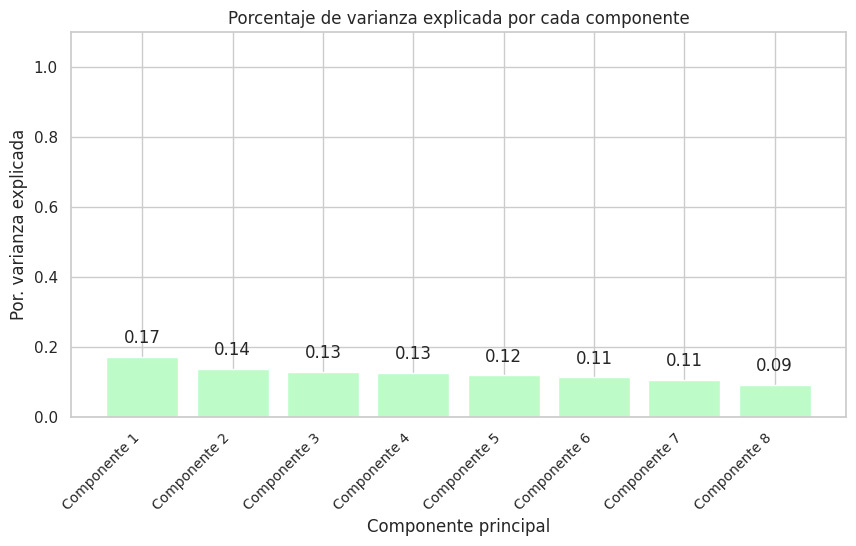

Cargas de las características en los componentes principales:
   location  intakereason  breedname  basecolour  speciesname  animalage  \
0  0.397205     -0.199952   0.364249    0.178134     0.602072   0.483209   
1  0.147003      0.118485   0.239816   -0.659084     0.063156  -0.139030   
2 -0.003366     -0.692244  -0.411781   -0.209174    -0.186943   0.121978   
3  0.564103     -0.000253  -0.489594    0.036084    -0.149329   0.295667   
4  0.227463      0.550713  -0.412533    0.261429     0.116759  -0.143918   
5  0.411491      0.217814   0.060848   -0.535514    -0.146639   0.049873   
6 -0.453672      0.340656  -0.076074   -0.169624    -0.147659   0.781442   
7  0.274793     -0.001936   0.469970    0.323926    -0.720649   0.105027   

    sexname  Mes_Ingreso  
0  0.060029    -0.195583  
1  0.665505     0.078945  
2  0.165369    -0.479892  
3  0.096248     0.567276  
4  0.282273    -0.540762  
5 -0.624256    -0.281193  
6  0.083838    -0.063966  
7  0.201212    -0.166831  


In [190]:

# Entrenar un modelo de PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X4)

# Extraer el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Obtener las cargas de los componentes principales
loadings = modelo_pca.components_

# Crear un DataFrame para almacenar las cargas con los nombres de las características originales
loadings_df = pd.DataFrame(loadings, columns=X4.columns)

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

# Crea un gráfico de barras para mostrar el porcentaje de varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
barplot = ax.bar(x=np.arange(modelo_pca.n_components_) + 1, height=modelo_pca.explained_variance_ratio_)

# Etiqueta el eje x con los nombres de las variables
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xticklabels(['Componente ' + str(i) for i in range(1, modelo_pca.n_components_ + 1)], fontsize=10, rotation=45, ha='right')

# Anotar los valores en el gráfico
for i, y in enumerate(modelo_pca.explained_variance_ratio_, start=1):
    label = round(y, 2)
    ax.annotate(label, (i, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Configuración del gráfico
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

# Mostrar el gráfico
plt.show()

# Mostrar las cargas de las características en un DataFrame
print("Cargas de las características en los componentes principales:")
print(loadings_df)

In [191]:
# Aplica SMOTE para balancear las clases
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X4, y4)

# Crea un nuevo DataFrame df4_balanceado con las características y la variable objetivo balanceadas
df4_balanceado = pd.concat([pd.DataFrame(X_resampled, columns=X4.columns), pd.DataFrame(y_resampled, columns=['campaña_especial'])], axis=1)

# Muestra el nuevo DataFrame balanceado
print(df4_balanceado)

       location  intakereason  breedname  basecolour  speciesname  animalage  \
0            26             0        481          49            0          9   
1            26             0        541           1            1          8   
2            26             0        327           1            0         14   
3             1             0        362          18            0          8   
4             9             0        362          65            0         18   
...         ...           ...        ...         ...          ...        ...   
21729         5             7         86           6            1          5   
21730         8            19        362          66            0          5   
21731        14             9        474           4            1          4   
21732         5            16        413           6            1          6   
21733         3            11        362          34            0          7   

       sexname  Mes_Ingreso  campaña_es

In [192]:
#Reviso como quedó balanceada la variable objetivo
conteo_campaña_especial = y_resampled.value_counts()

print(conteo_campaña_especial)

1    10867
0    10867
Name: campaña_especial, dtype: int64


In [193]:
xb = df4_balanceado[['location','intakereason', 'breedname', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso']]
yb = df4_balanceado['campaña_especial']

In [194]:


# Suponiendo que tienes Xr como las características y yr como la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(xb, yb, test_size=0.1, random_state=42)

# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest:", accuracy)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo Random Forest: 0.8325666973321068
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1040
           1       0.85      0.82      0.84      1134

    accuracy                           0.83      2174
   macro avg       0.83      0.83      0.83      2174
weighted avg       0.83      0.83      0.83      2174



Conclusiones:
Le agregamos una variable más 'Mes_Ingreso'la cual es el mes en la que el animal ingresa al refugio. Se agregó esta variable ya que podía ser una variable que influya en la cantidad de días que un animal permanezca en el refugio teniendo en cuenta que en determinados meses la actividad o las decisiones importantes que toman las personas disminuye, como por ejemplo en meses de vacaciones.
Como vemos en los resultados, lás métricas muestran una mejoría cercana al 5%, lo cual podemos decir que este nuevo modelo es superior al anterior para hacer predicciones.

#Evaluacion de modelos

Agrego una variable artificial 'Raza' que sea booleana. Si la columna breedname tiene la palabra 'domestic' no es de raza y toma el valor 1. Si es de Raza toma el valor 0. Hago esto porque creo que es una variable que puede influir significativamente en el resultado, es decir, en la cantidad de días que tarda un animal en ser adoptado.
Además vamos a probar dos modelos, Random Forest y Catboost para ver cual tiene mejor rendimiento a la hora de hacer predicciones. Luego hacemos análisis PCA sobre las variables utilizadas y seleccionar las más importantes.

In [195]:
# Agrega la nueva columna 'campaña_especial' basada en la condición
df4['Raza'] = df4['breedname'].str.contains('Domestic').astype(int)

In [196]:

x5 = df4[['location','intakereason', 'Raza', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso']]
y5 = df4['campaña_especial']

label_encoder = LabelEncoder()
x5['location'] = label_encoder.fit_transform(x5['location'])
x5['intakereason'] = label_encoder.fit_transform(x5['intakereason'])
x5['Raza'] = label_encoder.fit_transform(x5['Raza'])
x5['basecolour'] = label_encoder.fit_transform(x5['basecolour'])
x5['speciesname'] = label_encoder.fit_transform(x5['speciesname'])
x5['animalage'] = x5['animalage']
x5['sexname'] = label_encoder.fit_transform(x5['sexname'])
x5['Mes_Ingreso'] = x5['Mes_Ingreso']

X5=x5[['location','intakereason', 'Raza', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso']]

In [197]:
# Aplica SMOTE para balancear las clases
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X5, y5)

# Crea un nuevo DataFrame df5_balanceado con las características y la variable objetivo balanceadas
df5_balanceado = pd.concat([pd.DataFrame(X_resampled, columns=X5.columns), pd.DataFrame(y_resampled, columns=['campaña_especial'])], axis=1)

# Muestra el nuevo DataFrame balanceado
print(df5_balanceado)

       location  intakereason  Raza  basecolour  speciesname  animalage  \
0            26             0     0          49            0          9   
1            26             0     0           1            1          8   
2            26             0     0           1            0         14   
3             1             0     1          18            0          8   
4             9             0     1          65            0         18   
...         ...           ...   ...         ...          ...        ...   
21729         5            21     0          58            1          6   
21730        36            14     0          56            0          8   
21731         7             9     1           4            0          4   
21732         5            10     0          32            1          2   
21733         1             9     1          63            0          3   

       sexname  Mes_Ingreso  campaña_especial  
0            0            1                 1  
1  

In [198]:
#Reviso como quedó balanceada la variable objetivo
conteo_campaña_especial = y_resampled.value_counts()

print(conteo_campaña_especial)

1    10867
0    10867
Name: campaña_especial, dtype: int64


In [199]:
info_df = pd.DataFrame(columns=['Variable', 'Cantidad_de_Registros', 'Formato', 'Cantidad_de_Nulos', 'Ejemplo', 'Valores_Únicos'])


for col in df5_balanceado.columns:

    num_records = df5_balanceado[col].count()
    data_type = df5_balanceado[col].dtype
    num_nulls = df5_balanceado[col].isnull().sum()
    example_value = df5_balanceado[col].iloc[0]
    num_unique_values = df5_balanceado[col].nunique()
    info_df = info_df.append({'Variable': col,
                              'Cantidad_de_Registros': num_records,
                              'Formato': data_type,
                              'Cantidad_de_Nulos': num_nulls,
                              'Ejemplo': example_value,
                              'Valores_Únicos': num_unique_values},
                             ignore_index=True)
csv_string = info_df.to_csv(index=False)
print(csv_string)

Variable,Cantidad_de_Registros,Formato,Cantidad_de_Nulos,Ejemplo,Valores_Únicos
location,21734,int64,0,26,41
intakereason,21734,int64,0,0,24
Raza,21734,int64,0,0,2
basecolour,21734,int64,0,49,79
speciesname,21734,int64,0,0,2
animalage,21734,int64,0,9,23
sexname,21734,int64,0,0,2
Mes_Ingreso,21734,int64,0,1,12
campaña_especial,21734,int64,0,1,2



In [200]:
xc = df5_balanceado[['intakereason', 'Raza', 'basecolour', 'speciesname', 'animalage', 'sexname','Mes_Ingreso','location']]
yc = df5_balanceado['campaña_especial']

In [201]:
xc.head()

,intakereason,Raza,basecolour,speciesname,animalage,sexname,Mes_Ingreso,location
0,0,0,49,0,9,0,1,26
1,0,0,1,1,8,0,1,26
2,0,0,1,0,14,1,1,26
3,0,1,18,0,8,0,1,1
4,0,1,65,0,18,0,2,9


Aplicamos el modelo Random Forest y calculamos sus métricas

    n_estimators  train_accuracy  test_accuracy
0              1        0.892331       0.733671
1              2        0.892638       0.730451
2              3        0.945245       0.783349
3              4        0.943916       0.772309
4              5        0.960890       0.791168
5              6        0.960634       0.787948
6              7        0.969479       0.804508
7              8        0.969581       0.800828
8              9        0.974080       0.812328
9             10        0.973262       0.811868
10            11        0.976022       0.818307
11            12        0.975869       0.819227
12            13        0.977505       0.817387
13            14        0.977352       0.813707
14            15        0.978425       0.818767
15            16        0.978323       0.814627
16            17        0.978579       0.816927
17            18        0.978681       0.819687
18            19        0.979294       0.820147
19            20        0.979243       0

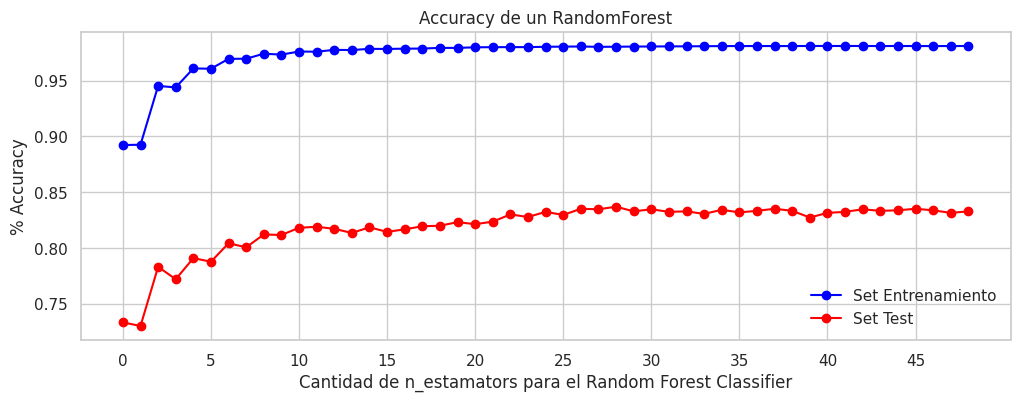

In [202]:
A_train = []
A_test = []

for i in range(1,50):

    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 42)
    #Entrenamos el modelo
    random_forest_model.fit(X_train,y_train)
    #Prediccion en Train y Test
    y_train_pred = random_forest_model.predict(X_train)
    y_test_pred = random_forest_model.predict(X_test)
    #Calculo el accuracy en Train y Test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Acumulo los resultados de Accuracy para cada corrida:

    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento', color='blue')
ax.plot(A_test,marker='o', label='Set Test', color='red')

ax.set_xlabel('Cantidad de n_estamators para el Random Forest Classifier')
ax.set_xticks(range(0,50,5))
ax.set_ylabel('% Accuracy')
ax.set_title('Accuracy de un RandomForest')
ax.legend()
# Crear un DataFrame con los valores de precisión
results_df = pd.DataFrame({
    'n_estimators': range(1, 50),
    'train_accuracy': A_train,
    'test_accuracy': A_test
})

# Imprimir la tabla de resultados
print(results_df)

 Un modelo con alrededor de 28 estimadores podría ser una buena elección, ya que proporciona una precisión razonablemente alta en el conjunto de prueba sin aumentar demasiado la complejidad del modelo.

    n_estimators  train_accuracy  test_accuracy
0              3        0.640337       0.634315
1              4        0.657924       0.646274
2              5        0.673875       0.665593
3              6        0.692331       0.679393
4              7        0.716104       0.704232
5              8        0.732873       0.714811
6              9        0.762474       0.728151
7             10        0.785123       0.744250
8             11        0.814724       0.756670
9             12        0.840491       0.767709
10            13        0.872290       0.781509
11            14        0.895348       0.790248
12            15        0.917791       0.804048
13            16        0.938548       0.805888
14            17        0.950767       0.820607
15            18        0.960174       0.818767
16            19        0.970041       0.827047
17            20        0.972597       0.821987
18            21        0.976329       0.822907
19            22        0.978425       0

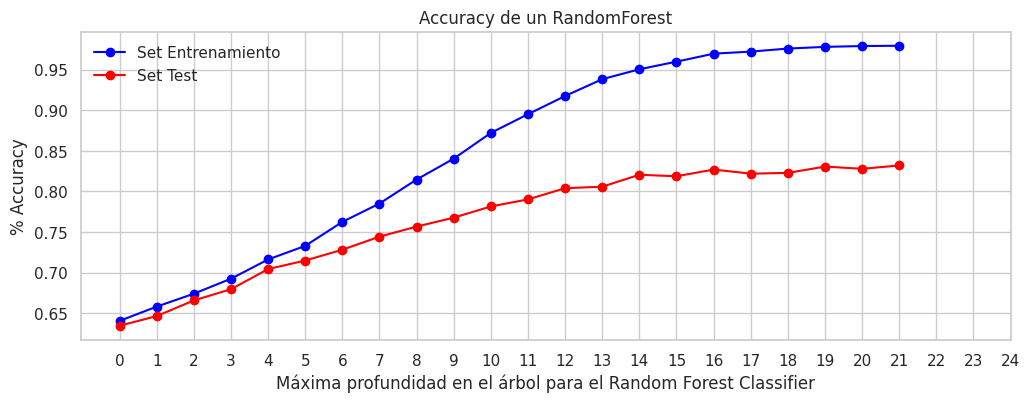

In [203]:
A_train = []
A_test = []

for i in range(3,25):

    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = 28, max_depth = i, random_state = 42)
    #Entrenamos el modelo
    random_forest_model.fit(X_train,y_train)
    #Prediccion en Train y Test
    y_train_pred = random_forest_model.predict(X_train)
    y_test_pred = random_forest_model.predict(X_test)
    #Calculo el accuracy en Train y Test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Acumulo los resultados de Accuracy para cada corrida:

    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento', color='blue')
ax.plot(A_test,marker='o', label='Set Test', color='red')

ax.set_xlabel('Máxima profundidad en el árbol para el Random Forest Classifier')
ax.set_xticks(range(0,25,1))
ax.set_ylabel('% Accuracy')

#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

# Crear un DataFrame con los valores de precisión
results_df = pd.DataFrame({
    'n_estimators': range(3,25),
    'train_accuracy': A_train,
    'test_accuracy': A_test
})

# Imprimir la tabla de resultados
print(results_df)

Consideramos un buen resultado en Accuracy, n_estimators = 28, max_depth =16

% de aciertos sobre el set de entrenamiento: 0.943
% de aciertos sobre el set de evaluación: 0.809


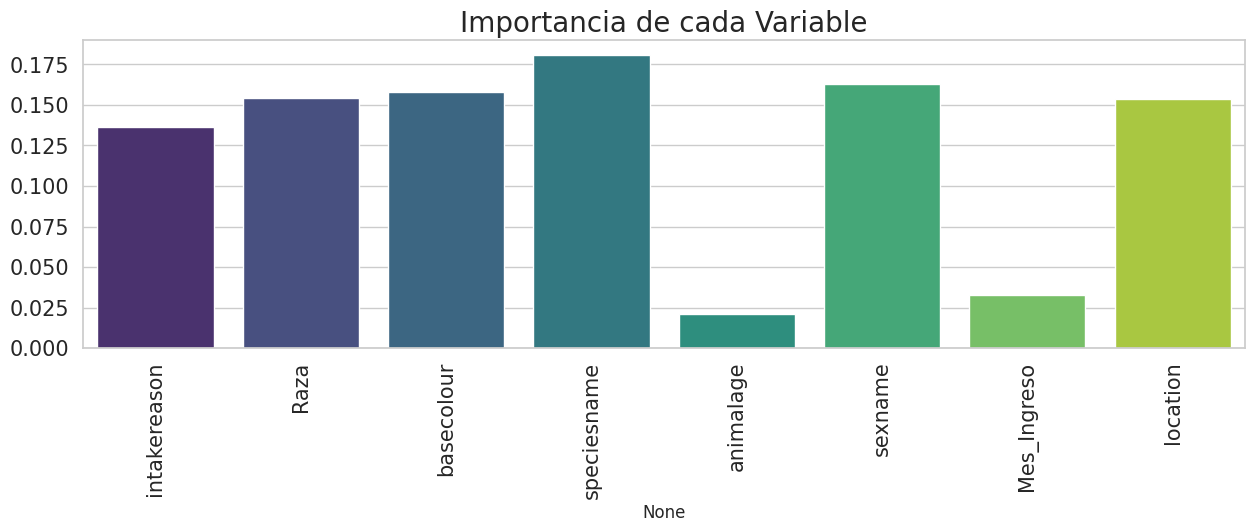

In [204]:
# Creo un objeto Random Forest
random_forest_model = RandomForestClassifier(n_estimators=28,
                                             max_depth =16,
                                             random_state=42,
                                             max_features="log2")

# Fiteo el modelo
random_forest_model.fit(X_train, y_train)

# Realizo la predicción de los modelos en Train y Test
y_train_pred_random_forest_model = random_forest_model.predict(X_train)
y_test_pred_random_forest_model = random_forest_model.predict(X_test)

# Calculo el accuracy en Train y Test - Random Forest
train_accuracy_random_forest = accuracy_score(y_train, y_train_pred_random_forest_model)
test_accuracy_random_forest = accuracy_score(y_test, y_test_pred_random_forest_model)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_random_forest,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_random_forest,3))

# Graficamos los pesos de las variables
importances = random_forest_model.feature_importances_
columns = xc.columns
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x=columns, y=importances, palette="viridis", ax=ax)
plt.title('Importancia de cada Variable', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Metricas:

In [214]:
#Calculo el accuracy en Train
train_accuracy_10_1_1 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_10_1_1 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

% de aciertos sobre el set de entrenamiento: 0.98
% de aciertos sobre el set de evaluación: 0.832


In [206]:
confusion_matrix(y_test, y_test_pred)

array([[877, 163],
       [202, 932]])

Verdaderos positivos (TP): 920
Falsos negativos (FN): 214
Falsos positivos (FP): 154
Verdaderos negativos (TN): 886

In [207]:
precision = round(precision_score(y_test, y_test_pred_random_forest_model),3)
precision


0.83

In [208]:
recall = round(recall_score(y_test, y_test_pred_random_forest_model),5)
recall

0.79718

roc_auc_score for Random_Forest:  0.88971


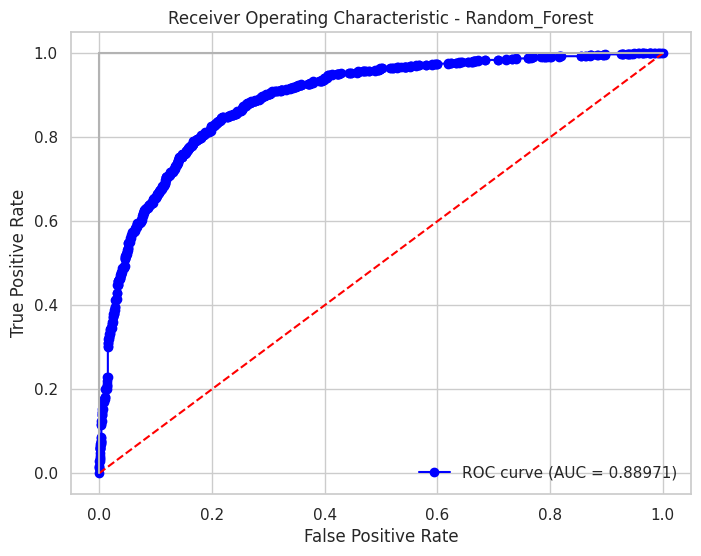

In [215]:
y_score1 = random_forest_model.predict_proba(X_test)[:,1]
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc = round(roc_auc_score(y_test, y_score1),5)
print('roc_auc_score for Random_Forest: ', roc)

plt.subplots(1, figsize=(8, 6))
plt.title('Receiver Operating Characteristic - Random_Forest')
plt.plot(false_positive_rate1, true_positive_rate1, marker='o', color='blue', label='ROC curve (AUC = {})'.format(roc))
plt.plot([0, 1], ls="--", color='red')
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [253]:
rf = {'Random_Forest':[test_accuracy,precision,recall,roc]}

Random_Forest = pd.DataFrame(rf, index = ['Accuracy','Precision','Recall','ROC_curve'])
Random_Forest

,Random_Forest
Accuracy,0.832107
Precision,0.830000
Recall,0.797180
ROC_curve,0.889710


La curva ROC tiene un valor de AUC cercano a 1 lo que indica que el modelo tiene un buen rendimiento en la clasificación y es capaz de distinguir entre las clases positivas y negativas con alta precisión.

Aplicamos el modelo Catboost y calculamos sus métricas:

In [217]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_traincb, X_testcb, y_traincb, y_testcb = train_test_split(xc, yc, test_size=0.3, random_state=42)

# Crear y entrenar el modelo CatBoostClassifier
cb_model = CatBoostClassifier(iterations=100, learning_rate=0.5, depth=5, loss_function='Logloss')
cb_model.fit(X_traincb, y_traincb)

# Hacer predicciones en el conjunto de prueba
y_predcb = cb_model.predict(X_testcb)

# Calcular la precisión del modelo
accuracycb = accuracy_score(y_testcb, y_predcb)
print("Precisión del modelo CatBoost:", accuracycb)

# Calcular la importancia de las variables
importancescb = cb_model.feature_importances_

0:	learn: 0.6483891	total: 6.59ms	remaining: 652ms
1:	learn: 0.6319309	total: 13.2ms	remaining: 648ms
2:	learn: 0.6192296	total: 20.5ms	remaining: 662ms
3:	learn: 0.6130928	total: 26.1ms	remaining: 626ms
4:	learn: 0.6078881	total: 34.6ms	remaining: 658ms
5:	learn: 0.6033710	total: 38.2ms	remaining: 599ms
6:	learn: 0.5997442	total: 45ms	remaining: 598ms
7:	learn: 0.5948605	total: 50.6ms	remaining: 582ms
8:	learn: 0.5907259	total: 56.7ms	remaining: 573ms
9:	learn: 0.5878362	total: 62.5ms	remaining: 562ms
10:	learn: 0.5833952	total: 68.6ms	remaining: 555ms
11:	learn: 0.5808303	total: 74.2ms	remaining: 544ms
12:	learn: 0.5770702	total: 80.2ms	remaining: 537ms
13:	learn: 0.5744881	total: 85.9ms	remaining: 528ms
14:	learn: 0.5731319	total: 95.3ms	remaining: 540ms
15:	learn: 0.5710461	total: 101ms	remaining: 532ms
16:	learn: 0.5677588	total: 107ms	remaining: 521ms
17:	learn: 0.5654331	total: 113ms	remaining: 513ms
18:	learn: 0.5630896	total: 119ms	remaining: 507ms
19:	learn: 0.5606137	total: 

In [211]:
#Calculamos la importancia de las variables
headers = ["name", "score"]
values = sorted(zip(X_traincb.columns, cb_model.feature_importances_), key=lambda x: x[1] * -1)
feature_importancescb = pd.DataFrame(values, columns = headers)
feature_importancescb.head(10)

,name,score
0,intakereason,20.234853
1,location,16.135083
2,Mes_Ingreso,15.768039
3,basecolour,13.349754
4,animalage,13.223001
5,Raza,11.913915
6,speciesname,5.871114
7,sexname,3.504241


(8, 2)


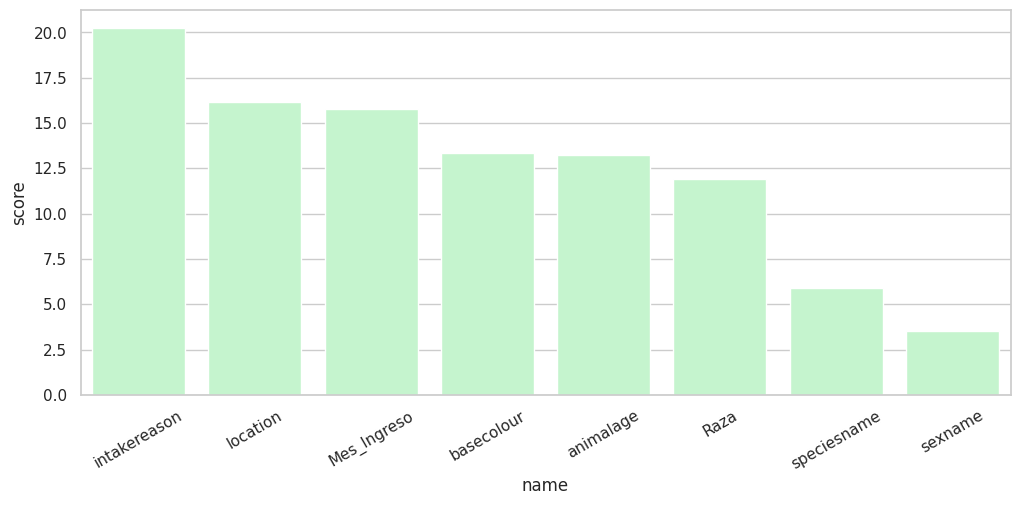

In [212]:
final_importance= feature_importancescb.head(8)
print(final_importance.shape)
plt.figure(figsize=(12,5))
ax=sns.barplot(x=final_importance.name, y= final_importance.score)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.show()

Metricas

In [229]:
# calcular y imprimir los scores del modelo
y_train_predcb = cb_model.predict(X_traincb)
y_test_predcb = cb_model.predict(X_testcb)


print('Catboost accuracy score for train: %.3f: test: %.3f' % (accuracy_score(y_traincb, y_train_predcb),accuracy_score(y_testcb, y_test_predcb)))

Catboost accuracy score for train: 0.771: test: 0.736


Accuracy

In [248]:

#Calculo el accuracy en Train
train_accuracycb = accuracy_score(y_traincb, y_train_predcb)

#Calculo el accuracy en Test
test_accuracycb = accuracy_score(y_testcb, y_test_predcb)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracycb,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracycb,3))

% de aciertos sobre el set de entrenamiento: 0.771
% de aciertos sobre el set de evaluación: 0.736


Matriz de confusión

In [234]:
confusion_matrix(y_testcb, y_test_predcb)

array([[2421,  815],
       [ 904, 2381]])

Precisión

In [235]:
precision_cb = round(precision_score(y_testcb, y_test_predcb),5)
precision_cb

0.74499

In [236]:
recall_cb = round(recall_score(y_testcb, y_test_predcb),5)
recall_cb

0.72481

roc_auc_score for knn classifier:  0.80996


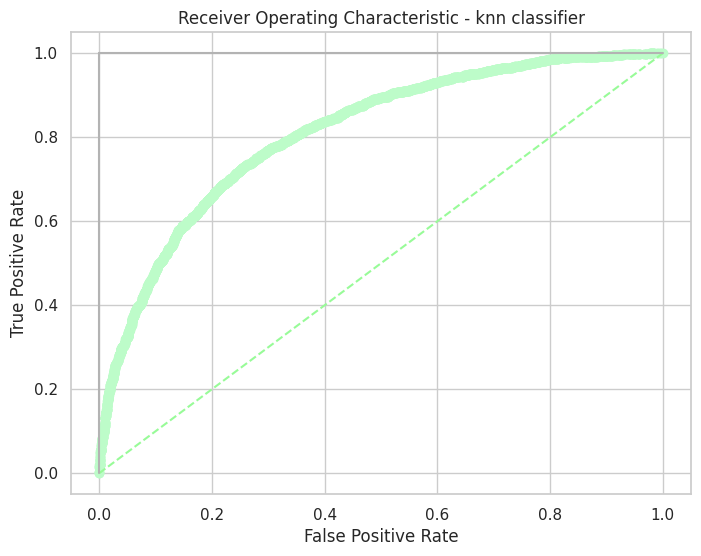

In [240]:
y_score1 = cb_model.predict_proba(X_testcb)[:,1]
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_testcb, y_score1)
roc_cb = round(roc_auc_score(y_testcb, y_score1),5)
print('roc_auc_score for knn classifier: ', roc_cb)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - knn classifier')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [254]:
cb = {'Catboost':[test_accuracycb,precision_cb,recall_cb,roc_cb]}

Catboost = pd.DataFrame(cb, index = ['Accuracy','Precision','Recall','ROC_curve'])
Catboost

,Catboost
Accuracy,0.73639
Precision,0.74499
Recall,0.72481
ROC_curve,0.80996


Podemos observar que el modelo de Random Forest tiene mejor precisión que el Catboost (Aproximadamente un 10%).

Porcentaje de varianza explicada por cada componente
[0.24650565 0.1383654  0.13348797 0.12881795 0.11802031 0.11224096
 0.10510203 0.01745971]


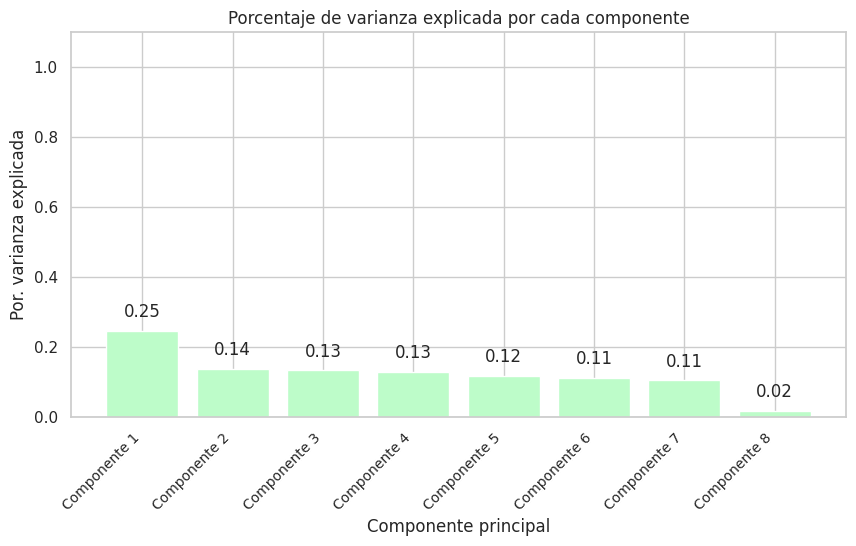

Cargas de las características en los componentes principales:
   intakereason      Raza  basecolour  speciesname  animalage   sexname  \
0     -0.071196 -0.668378    0.127720     0.658838   0.229603 -0.015828   
1     -0.003638  0.029842   -0.459972    -0.006274   0.249483  0.593223   
2     -0.544299  0.167571    0.324092    -0.228768   0.592540 -0.283249   
3      0.595775 -0.002431    0.421204     0.015158   0.032932 -0.248509   
4      0.357475  0.071426   -0.342563    -0.088221   0.041884 -0.413384   
5      0.325424  0.118797    0.510474    -0.114072   0.241239  0.564257   
6      0.330770 -0.004340   -0.334064    -0.001960   0.687205 -0.125802   
7      0.024734 -0.710676   -0.011513    -0.701805  -0.025520  0.027402   

   Mes_Ingreso  location  
0    -0.137165  0.161369  
1     0.342482  0.505997  
2     0.037564  0.292479  
3     0.573939  0.274149  
4    -0.546797  0.519952  
5    -0.479379  0.001958  
6     0.063759 -0.535563  
7     0.014798 -0.006636  


In [241]:

# Entrenar un modelo de PCA para analizar la reducción de dimensionalidad.


pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(xc)

# Extraer el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Obtener las cargas de los componentes principales
loadings = modelo_pca.components_

# Crear un DataFrame para almacenar las cargas con los nombres de las características originales
loadings_df = pd.DataFrame(loadings, columns=xc.columns)

# Porcentaje de varianza explicada por cada componente
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

# Crea un gráfico de barras para mostrar el porcentaje de varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
barplot = ax.bar(x=np.arange(modelo_pca.n_components_) + 1, height=modelo_pca.explained_variance_ratio_)

# Etiqueta el eje x con los nombres de las variables
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_xticklabels(['Componente ' + str(i) for i in range(1, modelo_pca.n_components_ + 1)], fontsize=10, rotation=45, ha='right')

# Anotar los valores en el gráfico
for i, y in enumerate(modelo_pca.explained_variance_ratio_, start=1):
    label = round(y, 2)
    ax.annotate(label, (i, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Configuración del gráfico
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

# Mostrar el gráfico
plt.show()

# Mostrar las cargas de las características en un DataFrame
print("Cargas de las características en los componentes principales:")
print(loadings_df)

In [242]:
# Obtener las cargas de las características en el primer componente principal
cargas_componente_1 = loadings_df.iloc[0]

cargas_ordenadas_componente_1 = cargas_componente_1.abs().sort_values(ascending=False)

print("Características con las cargas más altas en el primer componente principal:")
print(cargas_ordenadas_componente_1)


Características con las cargas más altas en el primer componente principal:
Raza            0.668378
speciesname     0.658838
animalage       0.229603
location        0.161369
Mes_Ingreso     0.137165
basecolour      0.127720
intakereason    0.071196
sexname         0.015828
Name: 0, dtype: float64


In [243]:
# Obtener las cargas de las características en el segundo componente principal
cargas_componente_2 = loadings_df.iloc[1]

cargas_ordenadas_componente_2 = cargas_componente_2.abs().sort_values(ascending=False)

print("Características con las cargas más altas en el segundo componente principal:")
print(cargas_ordenadas_componente_2)


Características con las cargas más altas en el segundo componente principal:
sexname         0.593223
location        0.505997
basecolour      0.459972
Mes_Ingreso     0.342482
animalage       0.249483
Raza            0.029842
speciesname     0.006274
intakereason    0.003638
Name: 1, dtype: float64


Podemos observar que el resultado està explicado en un 40% por los dos primeros componentes. El componente principal está altamente asociado a la raza y a la especie mientras que el segundo componente està asociado al sexo, color y ubicación. Finalmente podríamos evaluar de eliminar la variable 'intakereason' ya que tiene cargas bajas en los primeros dos componentes pero considerando que la carga no es nula y que además tenemos un modelo con pocas variables, vamos a sostener las 8 variables que tenemos.

# Cross Validation y Mejora de Modelos

Realizamos una búsqueda de hiperparámetros utilizando la validación cruzada de K-fold y GridSearchCV para nuestro modelo de clasificación.

In [257]:


X = xc
y = yc

# Definir el modelo
model = RandomForestClassifier()

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir la estrategia de validación cruzada (KFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir el objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mostrar el mejor puntaje (score)
print("Mejor puntaje (accuracy):", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntaje (accuracy): 0.8212940334411352


In [261]:
# Volvemos a calcular el Random Forest con los mejores hyperparametros
random_forest_model_mejorado=RandomForestClassifier(max_depth=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              n_estimators=300)
#Entrenamos el modelo
random_forest_model_mejorado.fit(X_train,y_train)
#Prediccion en Train y Test
y_train_pred = random_forest_model_mejorado.predict(X_train)
y_test_pred = random_forest_model_mejorado.predict(X_test)

#Calculo el accuracy en Train y Test
train_accuracy_RF2= accuracy_score(y_train, y_train_pred)
test_accuracy_RF2 = accuracy_score(y_test, y_test_pred)



Accuracy:
% de aciertos sobre el set de entrenamiento: 0.981
% de aciertos sobre el set de evaluación: 0.836 

 Matriz de Confusión
[[872 168]
 [189 945]]

 Precisión: 0.84906

 Recall:  0.83333

 roc_auc_score for Random Forest Mejorado:  0.90912


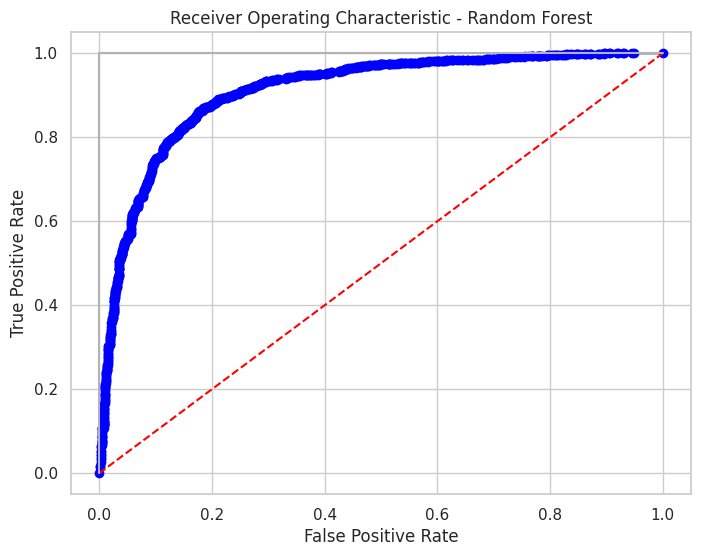

In [264]:
#Calulos las METRICAS
# ACCURACY
print('Accuracy:')
train_accuracy_RF2 = accuracy_score(y_train, y_train_pred)
test_accuracy_RF2 = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_RF2,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_RF2,3),'\n')

# MATRIZ DE CONFUSION
print(' Matriz de Confusión')
print(confusion_matrix(y_test, y_test_pred) )

# PRECISION
precision_RF2 = round(precision_score(y_test, y_test_pred),5)
print('\n Precisión:', precision_RF2)

#RECALL
recall_RF2 = round(recall_score(y_test, y_test_pred),5)
print('\n Recall: ', recall_RF2)

# AREA DE LA CURVA ROC
y_score1 = random_forest_model_mejorado.predict_proba(X_test)[:,1]
# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
roc_RF2 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score for Random Forest Mejorado: ', roc_RF2)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1, marker='o', color='blue', label='ROC curve (AUC = {})'.format(roc))
plt.plot([0, 1], ls="--", color='red')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




In [263]:
rf_mejorado = {'Random Forest Mejorado':[test_accuracy_RF2,precision_RF2, recall_RF2,roc_RF2]}

Random_Forest_Mejorado = pd.DataFrame(rf_mejorado, index = ['Accuracy','Precision','Recall','ROC_curve'])
Random_Forest_Mejorado

,Random Forest Mejorado
Accuracy,0.835787
Precision,0.849060
Recall,0.833330
ROC_curve,0.909120


#Conclusiones finales

Las mejores métricas se alacanzaron con el modelo Random Forest aplicando los hiperparámetros encontrados mediante los métodos de K-fold y GridSearchCV.

Estos hiperparámetros indican que el modelo RandomForestClassifier tiene un máximo de profundidad no limitado (max_depth=None), un mínimo de muestras por hoja de 1 (min_samples_leaf=1), un mínimo de muestras para dividir un nodo interno de 2 (min_samples_split=2) y utiliza 300 árboles en el bosque (n_estimators=300).

 Anteriormente habíamos logrado un porcentaje sensiblemente menor (alrededor del 81%) por lo que estas técnicas de cross validation han mejorado los resulados obtenidos anteriormente.

 Finalmente podemos decir que con el modelo desarrollado podemos resolver la problemática en cuestión con un nivel de predicción considerablemente alto.